# Estimating Income Effects on Social Distancing Using Linear Regression

In [366]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model as lm
import pickle

We can open the pickle file to get pandas dataframes that contain the data we need for the states we have chosen to examine.

In [367]:
state_list = ['Washington', 'Georgia', 'New Jersey', 'Utah']
with open('combined_data_dfs.pickle', 'rb') as file:
    combined_data_dfs = pickle.load(file)

Name each pandas dataframe for its state

In [368]:
utah=pd.DataFrame(combined_data_dfs[3])
nj=pd.DataFrame(combined_data_dfs[2])
ga=pd.DataFrame(combined_data_dfs[1])
was=pd.DataFrame(combined_data_dfs[0])

## Calculating Income Effects on Social Distancing in Utah

Calculate the mean distancing deviation in the google data for each month. This creates a mean for every county in the state.

In [369]:
feb_distance=[0]*(len(utah["County"]))
for x in range(0,20):
        feb_distance[x]=np.mean(utah.iloc[x,2:17])
        
mar_distance=[0]*(len(utah["County"]))
for x in range(0,20):
        mar_distance[x]=np.mean(utah.iloc[x,17:48])
        
apr_distance=[0]*(len(utah["County"]))
for x in range(0,20):
        apr_distance[x]=np.mean(utah.iloc[x,48:59])

Certain counties have employment in industries marked as (D) which means the number is confidential. Larger numbers
are estimated but smaller ones are not. We simply zero out the field to impute the data. We also append our distance averages to the dataframe.

In [370]:
for x in range(0,20):
    if utah.iloc[x,64]=="(D)":
        utah.iloc[x,64]=0

for x in range(0,20):
    for n in range(67,92):
        if utah.iloc[x,n]=="(D)":
            utah.iloc[x,n]=0

utah['f_dist']=feb_distance
utah['m_dist']=mar_distance
utah['a_dist']=apr_distance

We create measures of percentages for nonfarm jobs and industries hit hard by coronavirus (accomodations, entertainment, transportation, retail) as well as a number of transformations for fit.

In [372]:
nonfarm_pct=[0]*(len(utah["County"]))
covid_hit=[0]*(len(utah["County"]))
log_inc=[0]*(len(utah["County"]))
pct_2=[0]*(len(utah["County"]))
for x in range(0,20):
        nonfarm_pct[x]=float(utah.iloc[x,65])/float(utah.iloc[x,59])
        log_inc[x]=np.log(float(utah.iloc[x,1]))        
        #covid_hit[x]=(float(utah.iloc[x,83])+float(utah.iloc[x,84])+float(utah.iloc[x,68])+float(utah.iloc[x,73])+float(utah.iloc[x,74]))/float(utah.iloc[x,59])
        covid_hit[x]=(float(utah.iloc[x,83])+float(utah.iloc[x,84]))/float(utah.iloc[x,59])
utah['nfarm']=nonfarm_pct
utah['hosp']=covid_hit
utah['log_inc']=log_inc

for x in range(0,20):
    pct_2[x]=(float(utah.iloc[x,95]))**2
utah['pct_2']=pct_2

Exo_list is the contains the index of the independent variable that are used in the regression.

In [373]:
exo_list=list()

exo_list.append(97)#Log Income
exo_list.append(95)#Nonfarm employment
exo_list.append(96)#Covid affected employment


In order to use Scikit's linear regression model, we need to convert the dataframe to a numpy array and change the types
to floats from the original strings.

In [374]:
Y=utah['a_dist'].to_numpy()
X=utah.iloc[:,exo_list].to_numpy()
for i in range(0, len(Y)): 
    Y[i] = float(Y[i])
for i in range(0,len(X[:,1])):
    for n in range(0,len(X[1,:])):
        X[i,n]=float(X[i,n])
ut_X=X[:,0]
ut_Xb=X[:,1]
ut_Xc=X[:,2]
ut_Y=Y

Our regression model for UT and NJ is as follows:  

percent change from baseline work trips = b_0 + b_1 log county income (dollars) + b_2 percent nonfarm employment in county + b_3 percent employment in entertainment and hopsitality.

For GA and WA it is:  

percent change from baseline work trips = b_0 + b_1 log county income (dollars) + b_2 percent nonfarm employment in county + b_3 percent nonfarm employment in county^2.


The ouput from the regression includes the R-squared figure and the coefficients of regression. It also prints the average of the other two features for use in the SEIR model.

In [375]:
utah_reg = lm.LinearRegression().fit(X, Y)
print("R-squared: "+ str(utah_reg.score(X,Y)))
print("Regression Coefficients: " + str(utah_reg.coef_))
print("Regression Intercept: " + str(utah_reg.intercept_))
print("Average Nonfarm Employment Percent: " + str(np.mean(X[:,1])))
print("Average Covid Affected Employment Percent: " + str(np.mean(X[:,2])))
x=round((utah_reg.intercept_ + utah_reg.coef_[1]*np.mean(X[:,1]) + utah_reg.coef_[2]*np.mean(X[:,2])),3)
print("Equation: " + str(x) + str(round(utah_reg.coef_[0],6)) + "*log(income)" )

R-squared: 0.7487710834908439
Regression Coefficients: [ -26.71397541 -109.24707879   36.39840536]
Regression Intercept: 344.3604646793095
Average Nonfarm Employment Percent: 0.9557809844719977
Average Covid Affected Employment Percent: 0.09460863023806595
Equation: 243.388-26.713975*log(income)


## New Jersey

In [376]:
feb_distance=[0]*(len(nj["County"]))
for x in range(0,19):
        feb_distance[x]=np.mean(nj.iloc[x,2:17])
        
mar_distance=[0]*(len(nj["County"]))
for x in range(0,19):
        mar_distance[x]=np.mean(nj.iloc[x,17:48])
        
apr_distance=[0]*(len(nj["County"]))
for x in range(0,19):
        apr_distance[x]=np.mean(nj.iloc[x,48:59])

for x in range(0,19):
    if nj.iloc[x,64]=="(D)":
        nj.iloc[x,64]=0

for x in range(0,19):
    for n in range(67,92):
        if nj.iloc[x,n]=="(D)":
            nj.iloc[x,n]=0

nj['f_dist']=feb_distance
nj['m_dist']=mar_distance
nj['a_dist']=apr_distance

nonfarm_pct=[0]*(len(nj["County"]))
covid_hit=[0]*(len(nj["County"]))
log_inc=[0]*(len(nj["County"]))
pct_2=[0]*(len(nj["County"]))
for x in range(0,19):
        nonfarm_pct[x]=float(nj.iloc[x,65])/float(nj.iloc[x,59])
        log_inc[x]=np.log(float(nj.iloc[x,1]))        
        covid_hit[x]=(float(nj.iloc[x,83])+float(nj.iloc[x,84]))/float(nj.iloc[x,59])
nj['nfarm']=nonfarm_pct
nj['hosp']=covid_hit
nj['log_inc']=log_inc

for x in range(0,19):
    pct_2[x]=(float(nj.iloc[x,95]))**2
nj['pct_2']=pct_2

In [377]:
Y=nj['a_dist'].to_numpy()
X=nj.iloc[:,exo_list].to_numpy()
for i in range(0, len(Y)): 
    Y[i] = float(Y[i])
for i in range(0,len(X[:,1])):
    for n in range(0,len(X[1,:])):
        X[i,n]=float(X[i,n])
nj_X=X[:,0]
nj_Xb=X[:,1]
nj_Xc=X[:,2]
nj_Y=Y    

In [378]:
nj_reg = lm.LinearRegression().fit(X, Y)
print("R-squared: "+ str(nj_reg.score(X,Y)))
print("Regression Coefficients: " + str(nj_reg.coef_))
print("Regression Intercept: " + str(nj_reg.intercept_))
print("Average Nonfarm Employment Percent: " + str(np.mean(X[:,1])))
print("Average Covid Affected Employment Percent: " + str(np.mean(X[:,2])))
x=round((nj_reg.intercept_ + nj_reg.coef_[1]*np.mean(X[:,1]) + nj_reg.coef_[2]*np.mean(X[:,2])),3)
print("Equation: " + str(x) + str(round(nj_reg.coef_[0],6)) + "*log(income)" )

R-squared: 0.7769575595681705
Regression Coefficients: [ -15.53634493 -303.41319382   44.47584239]
Regression Intercept: 414.30323519394784
Average Nonfarm Employment Percent: 0.9909522466151492
Average Covid Affected Employment Percent: 0.08141178080190699
Equation: 117.256-15.536345*log(income)


## Georgia

Georgia and Washington use a different regression form than Utah and New Jersey since the entertainment industry 
employment percents are not correlated with workplace travel deviations in GA and WA.

In [379]:
exo_list=list()

exo_list.append(97)#Log Income
exo_list.append(95)#Nonfarm employment
exo_list.append(98)#Nonfarm^2

In [380]:
feb_distance=[0]*(len(ga["County"]))
for x in range(0,138):
        feb_distance[x]=np.mean(ga.iloc[x,2:17])
        
mar_distance=[0]*(len(ga["County"]))
for x in range(0,138):
        mar_distance[x]=np.mean(ga.iloc[x,17:48])
        
apr_distance=[0]*(len(ga["County"]))
for x in range(0,138):
        apr_distance[x]=np.mean(ga.iloc[x,48:59])

for x in range(0,138):
    if ga.iloc[x,64]=="(D)":
        ga.iloc[x,64]=0

for x in range(0,138):
    for n in range(67,92):
        if ga.iloc[x,n]=="(D)":
            ga.iloc[x,n]=0

ga['f_dist']=feb_distance
ga['m_dist']=mar_distance
ga['a_dist']=apr_distance

nonfarm_pct=[0]*(len(ga["County"]))
covid_hit=[0]*(len(ga["County"]))
log_inc=[0]*(len(ga["County"]))
pct_2=[0]*(len(ga["County"]))
for x in range(0,138):
        nonfarm_pct[x]=float(ga.iloc[x,65])/float(ga.iloc[x,59])
        log_inc[x]=np.log(float(ga.iloc[x,1]))        
        covid_hit[x]=(float(ga.iloc[x,83])+float(ga.iloc[x,84]))/float(ga.iloc[x,59])
ga['nfarm']=nonfarm_pct
ga['hosp']=covid_hit
ga['log_inc']=log_inc

for x in range(0,138):
    pct_2[x]=(float(ga.iloc[x,95]))**2
ga['pct_2']=pct_2

In [381]:
Y=ga['a_dist'].to_numpy()
X=ga.iloc[:,exo_list].to_numpy()
for i in range(0, len(Y)): 
    Y[i] = float(Y[i])
for i in range(0,len(X[:,1])):
    for n in range(0,len(X[1,:])):
        X[i,n]=float(X[i,n])
ga_X=X[:,0]
ga_Xb=X[:,1]
ga_Xc=ga['hosp']
ga_Y=Y

In [382]:
ga_reg = lm.LinearRegression().fit(X, Y)
print("R-squared: "+ str(ga_reg.score(X,Y)))
print("Regression Coefficients: " + str(ga_reg.coef_))
print("Regression Intercept: " + str(ga_reg.intercept_))
print("Average Nonfarm Employment Percent: " + str(np.mean(X[:,1])))
x=round((ga_reg.intercept_ + ga_reg.coef_[1]*np.mean(X[:,1]) + ga_reg.coef_[2]*np.mean(X[:,2])**2),3)
print("Equation: " + str(x) + str(round(ga_reg.coef_[0],6)) + "*log(income)" )

R-squared: 0.5746196598544111
Regression Coefficients: [  -10.88940771  2741.9630794  -1493.0762672 ]
Regression Intercept: -1178.1198259315738
Average Nonfarm Employment Percent: 0.9618369579207076
Equation: 177.899-10.889408*log(income)


## Washington

In [383]:
feb_distance=[0]*(len(was["County"]))
for x in range(0,29):
        feb_distance[x]=np.mean(was.iloc[x,2:17])
        
mar_distance=[0]*(len(was["County"]))
for x in range(0,29):
        mar_distance[x]=np.mean(was.iloc[x,17:48])
        
apr_distance=[0]*(len(was["County"]))
for x in range(0,29):
        apr_distance[x]=np.mean(was.iloc[x,48:59])

for x in range(0,29):
    if was.iloc[x,64]=="(D)":
        was.iloc[x,64]=0

for x in range(0,29):
    for n in range(67,92):
        if was.iloc[x,n]=="(D)":
            was.iloc[x,n]=0

was['f_dist']=feb_distance
was['m_dist']=mar_distance
was['a_dist']=apr_distance

nonfarm_pct=[0]*(len(was["County"]))
covid_hit=[0]*(len(was["County"]))
log_inc=[0]*(len(was["County"]))
pct_2=[0]*(len(was["County"]))
for x in range(0,29):
        nonfarm_pct[x]=float(was.iloc[x,65])/float(was.iloc[x,59])
        log_inc[x]=np.log(float(was.iloc[x,1]))        
        covid_hit[x]=(float(was.iloc[x,83])+float(was.iloc[x,84]))/float(was.iloc[x,59])
was['nfarm']=nonfarm_pct
was['hosp']=covid_hit
was['log_inc']=log_inc

for x in range(0,29):
    pct_2[x]=(float(was.iloc[x,95]))**2
was['pct_2']=pct_2

In [384]:
Y=was['a_dist'].to_numpy()
X=was.iloc[:,exo_list].to_numpy()
for i in range(0, len(Y)): 
    Y[i] = float(Y[i])
for i in range(0,len(X[:,1])):
    for n in range(0,len(X[1,:])):
        X[i,n]=float(X[i,n])
was_X=X[:,0]
was_Xb=X[:,1]
was_Xc=was['hosp']
was_Y=Y

In [385]:
was_reg = lm.LinearRegression().fit(X, Y)
print("R-squared: "+ str(was_reg.score(X,Y)))
print("Regression Coefficients: " + str(was_reg.coef_))
print("Regression Intercept: " + str(was_reg.intercept_))
print("Average Nonfarm Employment Percent: " + str(np.mean(X[:,1])))
x=round((was_reg.intercept_ + was_reg.coef_[1]*np.mean(X[:,1]) + was_reg.coef_[2]*np.mean(X[:,2])**2),3)
print("Equation: " + str(x) + str(round(was_reg.coef_[0],6)) + "*log(income)" )

R-squared: 0.4852753086671892
Regression Coefficients: [ -22.61995418 -543.40292868  282.18316546]
Regression Intercept: 458.6062233273898
Average Nonfarm Employment Percent: 0.9493031221593514
Equation: 173.065-22.619954*log(income)


## Data Visualization

Preparing the Data to be plotted by converting numpy arrays to lists

In [395]:
col=[]
ut_X=list(ut_X)#20 elements
nj_X=list(nj_X)#19 elements
ga_X=list(ga_X)#138
was_X=list(was_X)#29

ut_Xb=list(ut_Xb)
nj_Xb=list(nj_Xb)
ga_Xb=list(ga_Xb)
was_Xb=list(was_Xb)

ut_Xc=list(ut_Xc)
nj_Xc=list(nj_Xc)
ga_Xc=list(ga_Xc)
was_Xc=list(was_Xc)

ut_Xd=list(utah['Per Capita Income 2018'])
nj_Xd=list(nj['Per Capita Income 2018'])
ga_Xd=list(ga['Per Capita Income 2018'])
was_Xd=list(was['Per Capita Income 2018'])

ut_Y=list(ut_Y)
nj_Y=list(nj_Y)
ga_Y=list(ga_Y)
was_Y=list(was_Y)

col[0:19]=['red']*20
col[20:38]=['green']*19
col[39:176]=['blue']*138
col[177:205]=['yellow']*29


Scatterplot 1: Distancing Deviation vs. Per Capita Income on the County Level

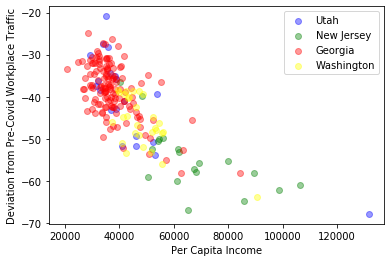

In [396]:
plt.scatter(ut_Xd, ut_Y, color='blue', label="Utah",alpha=0.4)
plt.scatter(nj_Xd, nj_Y, color='green', label="New Jersey",alpha=0.4)
plt.scatter(ga_Xd, ga_Y, color='red', label="Georgia",alpha=0.4)
plt.scatter(was_Xd, was_Y, color='yellow', label="Washington",alpha=0.4)
plt.legend(loc="upper right")
plt.xlabel("Per Capita Income")
plt.ylabel("Deviation from Pre-Covid Workplace Traffic")
plt.show()

Per Capita Income with a Logarithmic Transformation

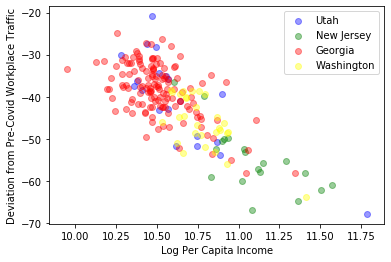

In [387]:
plt.scatter(ut_X, ut_Y, color='blue', label="Utah",alpha=0.4)
plt.scatter(nj_X, nj_Y, color='green', label="New Jersey",alpha=0.4)
plt.scatter(ga_X, ga_Y, color='red', label="Georgia",alpha=0.4)
plt.scatter(was_X, was_Y, color='yellow', label="Washington",alpha=0.4)
plt.legend(loc="upper right")
plt.xlabel("Log Per Capita Income")
plt.ylabel("Deviation from Pre-Covid Workplace Traffic")
plt.show()

Scatterplot 2: Distancing Deviation vs. Percent Employed in Nonfarm Jobs

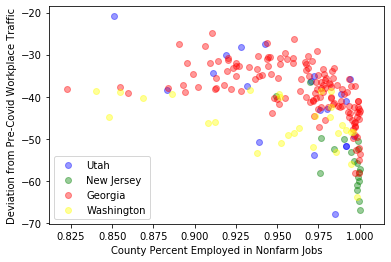

In [388]:
plt.scatter(ut_Xb, ut_Y, color='blue', label="Utah",alpha=0.4)
plt.scatter(nj_Xb, nj_Y, color='green', label="New Jersey",alpha=0.4)
plt.scatter(ga_Xb, ga_Y, color='red', label="Georgia",alpha=0.4)
plt.scatter(was_Xb, was_Y, color='yellow', label="Washington",alpha=0.4)
plt.legend(loc="lower left")
plt.xlabel("County Percent Employed in Nonfarm Jobs")
plt.ylabel("Deviation from Pre-Covid Workplace Traffic")
plt.show()

Scatterplot 3: Distancing Deviation vs. Percent Employed in At-Risk Industries

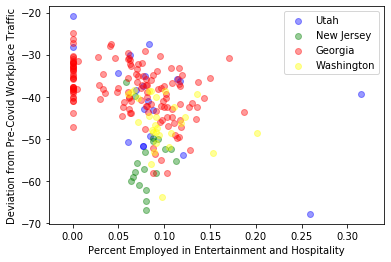

In [392]:
plt.scatter(ut_Xc, ut_Y, color='blue', label="Utah",alpha=0.4)
plt.scatter(nj_Xc, nj_Y, color='green', label="New Jersey",alpha=0.4)
plt.scatter(ga_Xc, ga_Y, color='red', label="Georgia",alpha=0.4)
plt.scatter(was_Xc, was_Y, color='yellow', label="Washington",alpha=0.4)
plt.legend(loc="upper right")
plt.xlabel("Percent Employed in Entertainment and Hospitality")
plt.ylabel("Deviation from Pre-Covid Workplace Traffic")
plt.show()